In [2]:
import pandas as pd
PATH = '/home/kai/data/kaggle/homecredit/'
x = pd.read_csv(PATH + 'bayes_opt_result.csv').sort_values(' target')
x

,# num_leaves,feature_fraction,bagging_fraction,max_depth,lambda_l1,lambda_l2,min_split_gain,scale_pos_weight,min_child_weight,early_stopping_round,target
10,45.381868,0.485763,0.872514,9.047504,0.040939,0.023209,0.037630,2.542801,2.711469,299.513625,0.795340
3,49.987430,0.485465,0.985119,8.883002,0.780529,0.521848,0.057275,2.887496,3.951048,197.314253,0.795674
0,50.073897,0.358358,0.958345,5.434775,0.978618,0.639921,0.027191,2.235271,18.615887,250.595680,0.795772
9,39.375860,0.369478,0.939406,5.007609,0.006961,0.904276,0.069071,2.906177,49.848645,239.503292,0.796001
1,53.734166,0.275035,0.905779,5.100890,0.799159,0.143353,0.077649,2.224191,22.414566,181.557384,0.796194
2,51.260794,0.456709,0.913609,9.154773,0.461479,0.944669,0.046159,2.233868,35.183929,169.338945,0.796425
14,57.936145,0.422527,0.878904,9.761624,0.165733,0.082516,0.033942,1.007755,47.287931,298.352918,0.796503
6,38.357494,0.248765,0.819948,9.958697,0.962236,0.120402,0.083471,2.936750,48.348527,212.702846,0.796677
16,58.717591,0.124466,0.856817,9.846634,0.389624,0.769364,0.088261,2.211749,2.541336,152.008508,0.796740
4,47.320406,0.253377,0.814207,9.341361,0.118274,0.414662,0.002860,2.363641,33.671569,204.556616,0.796827


In [8]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'
train = pd.read_csv(PATH + 'application_train.csv')
print('train')
test = pd.read_csv(PATH + 'application_test.csv')
print('test')
bureau = pd.read_csv(PATH + 'bureau.csv')
print('bureau')
bb = pd.read_csv(PATH + 'bureau_balance.csv')
print('bureau_balance')
df = pd.concat([train[['SK_ID_CURR']], test[['SK_ID_CURR']]])
print('concat')

train
test
bureau
bureau_balance
concat


In [ ]:
bbid = set(bb.SK_ID_BUREAU)
bid = set(bureau.SK_ID_BUREAU)
bcid = set(bureau.SK_ID_CURR)
trid = set(train.SK_ID_CURR)
teid = set(test.SK_ID_CURR)
diid = set(bbid & bid)
dicid = set([bureau.loc[i, 'SK_ID_CURR'] for i in range(bureau.shape[0]) if bureau.loc[i, 'SK_ID_BUREAU'] in diid])

In [ ]:
print('te-bcid', len(teid&bcid)/len(teid),len(teid&bcid),len(teid))
print('te-bcid', len(trid&bcid)/len(trid),len(trid&bcid),len(trid))

In [ ]:
print('te-bb', len(dicid&teid)/len(teid),len(dicid&teid),len(teid))
print('tr-bb', len(dicid&trid)/len(trid),len(dicid&trid),len(trid))

In [ ]:
print(len(ditrid))

In [2]:
import pandas as pd
PATH = '/home/kai/data/kaggle/homecredit/'

x = pd.read_csv(PATH + 'submission_merged0.csv')

In [4]:
y = x.groupby('SK_ID_CURR').mean().reset_index()

In [11]:
y[y.SK_ID_PREV == 1662353]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT


In [1]:
import pandas as pd
credit = pd.read_csv('/home/kai/data/kaggle/homecredit/credit_card_balance.csv')

In [2]:
credit.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [3]:
credit[['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL']]

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL
0,56.970,135000
1,63975.555,45000
2,31815.225,450000
3,236572.110,225000
4,453919.455,450000
5,82903.815,270000
6,353451.645,585000
7,47962.125,45000
8,291543.075,292500
9,201261.195,225000


In [11]:
sum(credit[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT']].sum(axis=1) - credit['AMT_DRAWINGS_CURRENT'] > 0)

2565

In [22]:
credit[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']].isnull().any()

AMT_DRAWINGS_ATM_CURRENT       True
AMT_DRAWINGS_OTHER_CURRENT     True
AMT_DRAWINGS_POS_CURRENT       True
AMT_DRAWINGS_CURRENT          False
AMT_BALANCE                   False
AMT_RECIVABLE                 False
AMT_TOTAL_RECEIVABLE          False
dtype: bool

In [18]:
sum(credit['AMT_PAYMENT_TOTAL_CURRENT'] - credit['AMT_BALANCE'] >= 0)

2273560

In [23]:
import pandas as pd

credit = pd.read_csv('/home/kai/data/kaggle/homecredit/credit_card_balance.csv')
credit['SK_ID_CURR'].unique()

array([378907, 363914, 371185, ..., 174455, 315041, 382749])

In [1]:
import pandas as pd

inst = pd.read_csv('/home/kai/data/kaggle/homecredit/installments_payments.csv')

NameError: name 'minus_name' is not defined

In [2]:
def minus_name(col1, col2): return col1 + '_minus_' + col2
def minus(df, col1, col2): return df[col1] - df[col2]

name1 = minus_name('DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT')
inst[name1] = minus(inst, 'DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT')
inst.at[inst[name1] < 0, name1] = 0
name2 = minus_name('AMT_INSTALMENT', 'AMT_PAYMENT')
inst[name2] = minus(inst, 'AMT_INSTALMENT', 'AMT_PAYMENT')
inst.at[inst[name2] < 0, name2] = 0

In [4]:
inst[name1].max()
inst[name2].max()

2424726.4050000003

[]

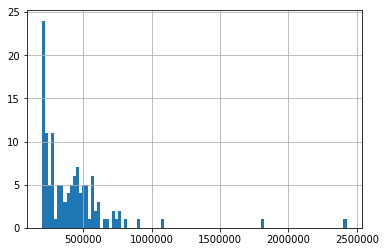

In [15]:
import matplotlib.pyplot as plt
tmp = inst[name2] > 200000

inst[tmp][name2].hist(bins=100)
plt.plot()

[]

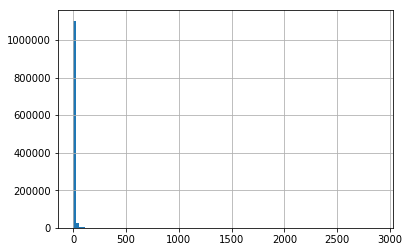

In [17]:
import matplotlib.pyplot as plt
tmp = inst[name1] != 0

inst[tmp][name1].hist(bins=100)
plt.plot()

In [20]:
inst[inst[name1] != 0].sort_values(name1, ascending=False)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT_minus_DAYS_INSTALMENT,AMT_INSTALMENT_minus_AMT_PAYMENT
8513003,1985467,316087,1.0,10,-2888.0,-4.0,8115.885,15.885,2884.0,8100.000
3198384,1088177,164168,1.0,6,-2891.0,-9.0,6749.190,11.160,2882.0,6738.030
5353635,2495473,210216,1.0,6,-2882.0,-11.0,10266.660,16.875,2871.0,10249.785
2318828,1564008,151276,0.0,17,-2911.0,-59.0,109.035,49.815,2852.0,59.220
1564161,2247294,168241,1.0,6,-2856.0,-4.0,10074.285,16.695,2852.0,10057.590
3662270,2433053,156137,1.0,10,-2853.0,-6.0,6105.285,177.525,2847.0,5927.760
6123374,1405072,230218,1.0,6,-2914.0,-101.0,7292.115,11.835,2813.0,7280.280
1988133,1081512,184984,0.0,1,-2875.0,-85.0,3348.720,5.220,2790.0,3343.500
12474443,1003276,423050,0.0,14,-2905.0,-115.0,24.525,9.000,2790.0,15.525
7370339,1732744,225340,1.0,8,-2905.0,-125.0,7254.720,18.540,2780.0,7236.180


In [1]:
cols = [x for x in inst.columns if x not in ['SK_ID_CURR']]

inst[cols][inst['SK_ID_PREV'] == 2463401].sort_values('DAYS_INSTALMENT', ascending=False)

NameError: name 'inst' is not defined

In [41]:
group = inst.groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])[['AMT_PAYMENT']].sum().reset_index()
group0 = inst.groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])[['AMT_INSTALMENT']].min().reset_index()



12627860

In [45]:
((group['AMT_PAYMENT'] - group0['AMT_INSTALMENT'])<0).sum()

75430

In [49]:
 75430/ 13605401

0.005544121779284565

In [61]:
set(group['NUM_INSTALMENT_VERSION'])

{1, 2, 3}

In [56]:
import pandas
x = pandas.read_csv('/home/kai/data/kaggle/homecredit/application_train.csv')
print(sum(x['TARGET'] == 0)/x.shape[0])

0.9192711805431351


In [57]:
x.shape

(307511, 122)

In [58]:
sum(x['TARGET'])

24825

In [59]:
24825/307511*48000

3874.983333929518

In [67]:
inst.isnull().any()

SK_ID_PREV                                  False
SK_ID_CURR                                  False
NUM_INSTALMENT_VERSION                      False
NUM_INSTALMENT_NUMBER                       False
DAYS_INSTALMENT                             False
DAYS_ENTRY_PAYMENT                           True
AMT_INSTALMENT                              False
AMT_PAYMENT                                  True
DAYS_ENTRY_PAYMENT_minus_DAYS_INSTALMENT     True
AMT_INSTALMENT_minus_AMT_PAYMENT             True
dtype: bool

In [1]:
# group = inst[inst['DAYS_ENTRY_PAYMENT'].isnull()].groupby(['SK_ID_PREV'])
l = []
for i, x in group:
#     l.append(i)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-1494faf726d2>, line 4)

In [2]:
import pandas
x = pandas.read_csv('/home/kai/data/kaggle/homecredit/POS_CASH_balance.csv')

sum(x['SK_DPD'].isnull()) / x.shape[0]

0.0

In [3]:
sum(x['SK_DPD_DEF'].isnull()) / x.shape[0]

0.0

In [4]:
x.isnull().any()

SK_ID_PREV               False
SK_ID_CURR               False
MONTHS_BALANCE           False
CNT_INSTALMENT            True
CNT_INSTALMENT_FUTURE     True
NAME_CONTRACT_STATUS     False
SK_DPD                   False
SK_DPD_DEF               False
dtype: bool

In [5]:
sum(x['SK_DPD_DEF'] == 0) / x.shape[0]

0.988604647488871

In [1]:
def f(x,y):
    print(x+y)
f({'x':1,'y':2})

TypeError: f() missing 1 required positional argument: 'y'

In [16]:
x = pd.DataFrame([[1],[2]])
x.sample(frac=0.5, random_state=0)

,0
1,2


In [8]:
import pandas as pd
x = pd.read_csv('./bayes_opt_result.csv').sort_values(' target', ascending=False)
x

,# num_leaves,feature_fraction,bagging_fraction,max_depth,lambda_l1,lambda_l2,min_split_gain,scale_pos_weight,min_child_weight,early_stopping_round,target
11,59.960006,0.162771,0.863025,8.926612,0.124696,0.213915,0.070922,1.046659,45.939472,293.196657,0.797427
15,57.581113,0.104876,0.923375,5.517362,0.872477,0.964694,0.003481,1.396140,19.132712,298.641715,0.797317
19,40.276053,0.107829,0.844538,8.916547,0.874085,0.853955,0.023892,1.126295,8.539174,188.542481,0.797314
13,39.255173,0.106348,0.809812,9.559909,0.299851,0.273796,0.041132,1.567663,49.297429,152.272687,0.797274
17,59.593600,0.133714,0.965983,7.973407,0.566902,0.958432,0.055252,1.697434,49.451916,206.723696,0.797217
12,38.969322,0.100759,0.833346,8.361108,0.162954,0.007832,0.077570,1.354354,21.798544,153.648301,0.797171
18,59.362621,0.101975,0.967610,9.706606,0.446857,0.922975,0.059940,1.681656,5.364207,293.339242,0.797059
7,42.522486,0.102292,0.887414,7.905772,0.066582,0.183852,0.005318,1.083214,49.847635,298.482002,0.797026
8,38.992855,0.192853,0.840760,7.609151,0.044563,0.303688,0.021711,1.015113,49.378524,216.816750,0.796964
5,38.002492,0.126482,0.895005,5.129603,0.421246,0.480264,0.030390,1.652395,41.826802,157.004154,0.796958
